# **Descargar archivo hogares 🔽📖🏠**

In [ ]:
import gdown

# Enlace directo de Google Drive
file_id = "1wgO49F3TkMJBWEbMQJltBH4e05yVSxMB"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Descargar el archivo a la carpeta local
output = "hogares_total_limpios_descargado.csv"
gdown.download(download_url, output, quiet=False)



Downloading...
From (original): https://drive.google.com/uc?export=download&id=1wgO49F3TkMJBWEbMQJltBH4e05yVSxMB
From (redirected): https://drive.google.com/uc?export=download&id=1wgO49F3TkMJBWEbMQJltBH4e05yVSxMB&confirm=t&uuid=be24145b-4e00-4447-b575-ea3713437f90
To: /content/hogares_total_limpios_descargado.csv
100%|██████████| 106M/106M [00:00<00:00, 124MB/s]


'hogares_total_limpios_descargado.csv'

# **Descargar  archivo icfes 2018 🔽📖📊**

In [2]:
import gdown

# Enlace directo de Google Drive
file_id = "1hPuqbMjfbcVxay2pMGlcmjWqdt0P6_OU"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Descargar el archivo a la carpeta local
output = "icfes_2018_descargado.csv"
gdown.download(download_url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1hPuqbMjfbcVxay2pMGlcmjWqdt0P6_OU
To: /content/icfes_2018_descargado.csv
100%|██████████| 14.0M/14.0M [00:00<00:00, 73.3MB/s]


'icfes_2018_descargado.csv'

# Librerias 📚

In [ ]:
!pip install pandas scikit-learn matplotlib


# K Means

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar los archivos CSV
hogares = pd.read_csv('hogares_total_limpios_descargado.csv')
icfes = pd.read_csv('icfes_2018_descargado.csv')

# Seleccionar las columnas de interés de cada dataset
hogares_selected = hogares[['personas', 'empleo_formal', 'desempleo_larga_duracion', 'acueducto', 'aseguramiento_salud', 'ipm']]
icfes_selected = icfes[['PUNT_MATEMATICAS', 'PUNT_INGLES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_GLOBAL']]

# Combinar los datasets, asegurando que tengan el mismo número de filas
# Aquí se realiza una concatenación horizontal (columna por columna)
combined_data = pd.concat([hogares_selected, icfes_selected], axis=1).dropna()

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data)


<ipython-input-4-67512497ba68>:7: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  hogares = pd.read_csv('hogares_total_limpios_descargado.csv')


In [5]:
# Definir el modelo K-means con 3 clústeres
kmeans = KMeans(n_clusters=3, random_state=0)

# Entrenar el modelo con los datos estandarizados
kmeans.fit(scaled_data)

# Obtener los clústeres y asignarlos al DataFrame
combined_data['cluster'] = kmeans.labels_

# Mostrar los primeros registros con sus clústeres asignados
print(combined_data.head())


   personas  empleo_formal  desempleo_larga_duracion  acueducto  \
0       3.0            1.0                       1.0        0.0   
1       2.0            1.0                       1.0        0.0   
2       6.0            1.0                       0.0        0.0   
3       4.0            1.0                       0.0        0.0   
4       4.0            0.0                       0.0        0.0   

   aseguramiento_salud   ipm  PUNT_MATEMATICAS  PUNT_INGLES  \
0                  0.0  30.0              34.0         52.0   
1                  0.0  30.0              34.0         52.0   
2                  1.0  45.0              47.0         47.0   
3                  1.0  30.0              79.0         87.0   
4                  0.0   0.0              79.0         87.0   

   PUNT_SOCIALES_CIUDADANAS  PUNT_C_NATURALES  PUNT_GLOBAL  cluster  
0                      32.0              41.0        194.0        2  
1                      32.0              41.0        194.0        2  
2       

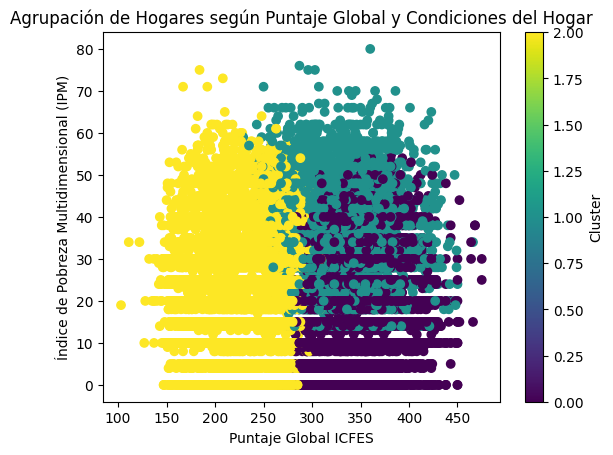

In [6]:
# Crear un gráfico de dispersión utilizando dos variables para visualizar los clústeres
plt.scatter(combined_data['PUNT_GLOBAL'], combined_data['ipm'], c=combined_data['cluster'], cmap='viridis')
plt.xlabel('Puntaje Global ICFES')
plt.ylabel('Índice de Pobreza Multidimensional (IPM)')
plt.title('Agrupación de Hogares según Puntaje Global y Condiciones del Hogar')
plt.colorbar(label='Cluster')
plt.show()
